## First Machine Learning Model Attempt - Predicting Survival on the Titanic

### *Data obtained from Kaggle*



Train.csv contains the details of a subset of 891 passengers on board  and importantly, will reveal whether they survived or not.

The test.csv dataset contains similar information but does not disclose whether they survived or not.

### Exploring the data

In [1]:
#Load in required libraies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import re

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#drop columns that wont be used to predict survival

train.drop('PassengerId',axis=1,inplace=True) #not useful 
train.drop('Cabin',axis=1,inplace=True) #too many missing values
train.drop('Ticket',axis=1,inplace=True) # too complex to feature engineer 

<AxesSubplot:xlabel='Survived', ylabel='count'>

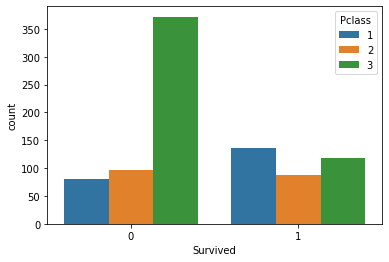

In [9]:
#graph to show an example of how a variable (Pclass) impacts survival

sns.countplot(x='Survived',data=train,hue='Pclass')

### Feature Engineering

The most useful part of the Name column is the Title 

In [13]:
def find_title(cols):

    name=cols[0]
    
    title=re.findall(' ([A-Za-z]+)\.',name)[0] 
    
    return title

train['Title']=train[['Name']].apply(find_title,axis=1)

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Lady          1
Countess      1
Jonkheer      1
Sir           1
Capt          1
Ms            1
Name: Title, dtype: int64

In [14]:
#combining similar Title catagories

def title_change(cols):
    
    title=cols[0]
    
    major=['Dr','Rev','Col','Don','Lady','Countess','Jonkheer','Countess','Sir','Capt','Major']
    young=['Miss','Mlle','Master']
    adult=['Mrs','Mme','Mr','Ms']
    
    
    if title in major:
        return 'Major'
    
    elif title in young:
        return 'Young'
    
    elif title in adult:
        return 'Adult'

In [15]:
train['Title']=train[['Title']].apply(title_change,axis=1)

In [16]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult


#### Converting catagorical variables to continuous variables

In [18]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
Pclass=pd.get_dummies(train['Pclass'],drop_first=True) # even though Pclass is fine as it is , it was also converted to continuous variables
Title=pd.get_dummies(train['Title'],drop_first=True)


In [19]:
train=pd.concat([train,sex,embark,Pclass,Title],axis=1)


In [20]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,male,Q,S,2,3,Major,Young
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult,1,0,1,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young,0,0,1,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,0,0,1,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1,0,1,0,1,0,0


In [21]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
 10  male      891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
 13  2         891 non-null    uint8  
 14  3         891 non-null    uint8  
 15  Major     891 non-null    uint8  
 16  Young     891 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(7)
memory usage: 75.8+ KB


#### Filling in missing Age values using the mean age of Title and Class

In [31]:
print(train[(train['Pclass']==1)&(train['Title']=='Young')]['Age'].median())
print(train[(train['Pclass']==1)&(train['Title']=='Adult')]['Age'].median())
print(train[(train['Pclass']==1)&(train['Title']=='Major')]['Age'].median())

27.5
40.0
48.5


In [24]:
print(train[(train['Pclass']==2)&(train['Title']=='Young')]['Age'].median())
print(train[(train['Pclass']==2)&(train['Title']=='Adult')]['Age'].median())
print(train[(train['Pclass']==2)&(train['Title']=='Major')]['Age'].median())

18.0
31.0
46.5


In [25]:
print(train[(train['Pclass']==3)&(train['Title']=='Young')]['Age'].median())
print(train[(train['Pclass']==3)&(train['Title']=='Adult')]['Age'].median())
print(train[(train['Pclass']==3)&(train['Title']=='Major')]['Age'].median())

12.0
28.0
nan


In [26]:
def impute_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    Title=cols[2]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            
            if Title=='Young':
                return 27.5
            
            elif Title=='Adult':
                return 40
            
            else:
                return 48.5
            
        if Pclass==2:
            
            if Title=='Young':
                return 18
            
            elif Title=='Adult':
                return 31
            
            else:
                return 46.5
            
        if Pclass==3:
            
            if Title=='Young':
                return 12
            
            elif Title=='Adult':
                return 28
        
       
    else:
        return Age

In [27]:
train['Age']=train[['Age','Pclass','Title']].apply(impute_age,axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    object 
 10  male      891 non-null    uint8  
 11  Q         891 non-null    uint8  
 12  S         891 non-null    uint8  
 13  2         891 non-null    uint8  
 14  3         891 non-null    uint8  
 15  Major     891 non-null    uint8  
 16  Young     891 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(7)
memory usage: 75.8+ KB


Filling in missing Embarked values using the mean 

In [29]:
train['Embarked'].value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train['Embarked'].fillna('S',inplace=True)

Dropping columns no longer required

In [32]:
train.drop(['Sex','Embarked','Name','Title'],axis=1,inplace=True)
train.drop('Pclass',axis=1,inplace=True)

In [33]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Major,Young
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0


In [34]:
train.rename(columns={ 2: 'Class2', 3: 'Class3'}, inplace=True) #renaming the class columns to avoid confusion

### Fitting the data to the model



In [36]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'Class2',
       'Class3', 'Major', 'Young'],
      dtype='object')

In [37]:
X_train=train[['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'Class2',
       'Class3', 'Major', 'Young']]
y_train=train['Survived']

In [38]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Cleaning the Test data in the same way as the Train data

In [40]:
test=pd.read_csv('titanic_test.csv')

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)
test['Title']=test[['Name']].apply(find_title,axis=1)
test['Title']=test[['Title']].apply(title_change,axis=1)

sex = pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)
Pclass=pd.get_dummies(test['Pclass'],drop_first=True)
Title=pd.get_dummies(test['Title'],drop_first=True)

test=pd.concat([test,sex,embark,Pclass,Title],axis=1)

test['Age']=test[['Age','Pclass','Title']].apply(impute_age,axis=1)

test['Embarked'].fillna('S',inplace=True)

test.drop(['Sex','Embarked','Name','Title'],axis=1,inplace=True)
test.drop('Pclass',axis=1,inplace=True)
test.to_csv("titanic_test_clean1.csv", index=False)

test.rename(columns={ 2: 'Class2', 3: 'Class3'}, inplace=True)


In [45]:
test[test['Fare'].isnull()] # the test data has missing data that the train data did not

,Age,SibSp,Parch,Fare,male,Q,S,Class2,Class3,Major,Young
152,60.5,0,0,NaN,1,0,1,0,1,0,0


In [46]:
train[train['Class3']==1]['Fare'].median() # replacing the missing value with the median
 

8.05

In [47]:
test['Fare'].fillna(8.05,inplace=True)

### Predicting Survival on the test data

In [48]:
predictions=logmodel.predict(test)

In [49]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
test2=pd.read_csv('titanic_test.csv')
submission = pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':predictions})
submission



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### This submission recieved a score of 0.76315 